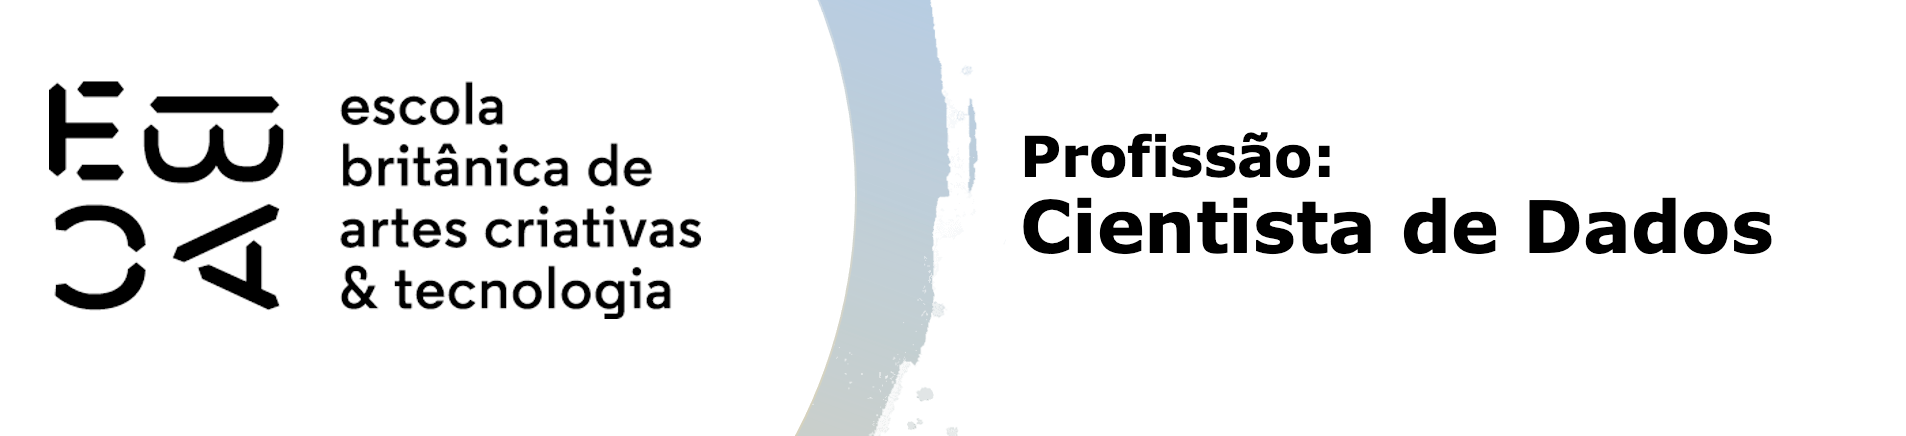

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

### Pacotes e Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./dados/online_shoppers_intention.csv')
df_quant = df.select_dtypes(include="number")
df_kmeans = df.iloc[:,:6]

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

### Verificação: Tipos e *Missings*

In [3]:
df_kmeans.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
dtype: object

In [4]:
df_kmeans.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

* Tudo Correto, sem valores faltantes e as colunas com os tipos corretos.

### Verificação de média de pessoa por conteúdo acessado e tempo médio de horas por pessoa.

In [5]:
print(df_kmeans['Administrative'].value_counts().mean())
print("Tempo médio de horas por pessoa: ",df_kmeans['Administrative_Duration'].value_counts().mean())

456.6666666666667
Tempo médio de horas por pessoa:  3.6971514242878563


In [6]:
print(df_kmeans['Informational'].value_counts().mean())
print("Tempo médio de horas pr pessoa: ",df_kmeans['Informational_Duration'].value_counts().mean())

725.2941176470588
Tempo médio de horas pr pessoa:  9.80127186009539


In [7]:
print(df_kmeans['ProductRelated'].value_counts().mean())
print("Tempo médio de horas por pessoa: ",df_kmeans['ProductRelated_Duration'].value_counts().mean())

39.646302250803856
Tempo médio de horas por pessoa:  1.2909642969322583


* Podemos ver que a maioria dos usuários procuram mais e passam mais tempo vendo **conteúdos informátivos**.
  * Contudo, não sabemos se isso se converte em compras ou não.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

### Padronizando.

In [8]:
scaler = StandardScaler()
df_kmeans_padronizado = scaler.fit_transform(df_kmeans)

### Método do Cotovelo

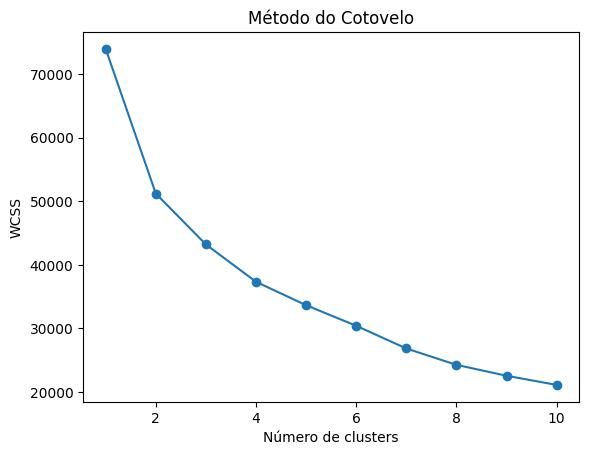

CPU times: total: 2.44 s
Wall time: 669 ms


In [9]:
%%time

wcss = []
for k in range (1,11):

    kmeans = KMeans(n_clusters=k, random_state = 27, n_init = 'auto')
    kmeans.fit(df_kmeans_padronizado)
    wcss.append(kmeans.inertia_)
    
# Plotando o método do cotovelo
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

### Coeficiente de Silhueta.

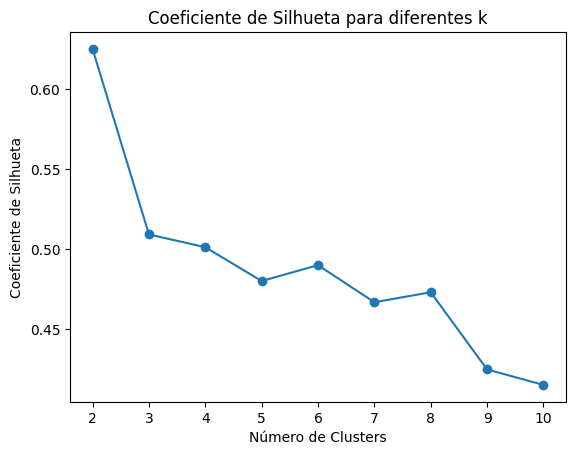

Melhor número de clusters com base no coeficiente de silhueta: 2
CPU times: total: 1min 3s
Wall time: 19.8 s


In [10]:
%%time

silhouette_scores = []

for k in range (2,11):
    kmeans = KMeans(n_clusters = k, random_state = 27, n_init = 'auto' )
    cluster_labels = kmeans.fit_predict(df_kmeans_padronizado)

    score = silhouette_score(df_kmeans_padronizado, cluster_labels)
    silhouette_scores.append(score)

melhor_k = np.argmax(silhouette_scores) + 2  


# Plotando os resultados
import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silhueta")
plt.title("Coeficiente de Silhueta para diferentes k")
plt.show()

print(f"Melhor número de clusters com base no coeficiente de silhueta: {melhor_k}")

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

 * Após avaliar, foi escolhido fazer com **3 e 4** clusters.
    1. Possuem boas métricas.
    2. Para não dividir muito o agrupamento.
    3. As métricas começam a piorar consideravelmente após **4 clusters**.
   

### Avaliação Descritiva dos grupos

In [11]:
df_kmeans['BounceRates'] = df['BounceRates']
df_kmeans['Revenue'] = df['Revenue']

# Aplicando KMeans com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=27, n_init='auto')
df_kmeans['Cluster_3'] = kmeans_3.fit_predict(df_kmeans_padronizado)

# Análise descritiva dos clusters
cluster_3_summary = df_kmeans.groupby('Cluster_3').mean()
cluster_3_summary

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,Revenue
Cluster_3,,,,,,,,
0,0.930009,25.014265,0.160103,6.532263,18.910852,688.969955,0.027191,0.125214
1,7.060998,269.230158,4.195933,476.574562,136.939002,5706.616105,0.006812,0.303142
2,6.558691,252.395361,0.999182,43.427551,57.448671,2129.327738,0.006486,0.234765


In [12]:
# Aplicando KMeans com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=27, n_init='auto')
df_kmeans['Cluster_4'] = kmeans_4.fit_predict(df_kmeans_padronizado)

# Análise descritiva dos clusters
cluster_4_summary = df_kmeans.groupby('Cluster_4').mean()
cluster_4_summary

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,Revenue,Cluster_3
Cluster_4,,,,,,,,,
0,0.850834,22.589560,0.156799,5.448468,19.191582,702.894934,0.027559,0.123760,0.009377
1,7.626911,284.413812,2.244648,151.690838,216.275229,8787.667529,0.005393,0.324159,1.376147
2,6.661106,258.807942,0.716418,26.635702,49.282704,1793.460577,0.006514,0.227392,1.841089
3,5.550542,192.701816,4.341155,477.974250,58.222022,2393.323067,0.007714,0.268953,1.265343


### Avaliação Gráfica dos grupos

Variância explicada por PC1 e PC2:
[0.50871305 0.17443704]


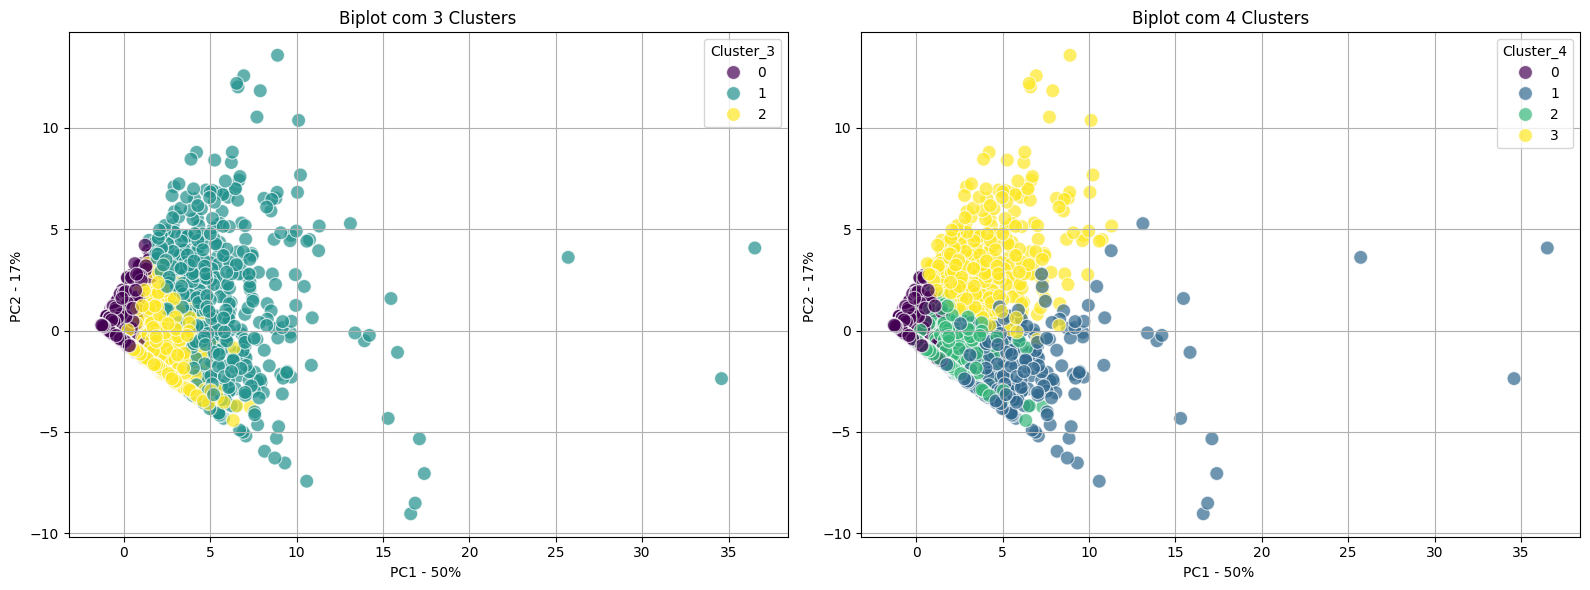

In [13]:
# Aplicando PCA para reduzir a 2 componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_kmeans_padronizado)

# Criando um DataFrame com os componentes principais
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Criando uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 linha, 2 colunas, tamanho total da figura 16x6

# --- Gráfico 1: 3 Clusters ---
# Aplicando KMeans com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=27, n_init='auto')
df_kmeans['Cluster_3'] = kmeans_3.fit_predict(df_kmeans_padronizado)

# Plotando os pontos para 3 clusters
sns.scatterplot(ax=axes[0], data=df_pca, x='PC1', y='PC2', hue=df_kmeans['Cluster_3'], palette='viridis', s=100, alpha=0.7)
axes[0].set_xlabel('PC1 - 50% ')
axes[0].set_ylabel('PC2 - 17% ')
axes[0].set_title('Biplot com 3 Clusters')
axes[0].grid(True)

# --- Gráfico 2: 4 Clusters ---
# Aplicando KMeans com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=27, n_init='auto')
df_kmeans['Cluster_4'] = kmeans_4.fit_predict(df_kmeans_padronizado)

# Plotando os pontos para 4 clusters
sns.scatterplot(ax=axes[1], data=df_pca, x='PC1', y='PC2', hue=df_kmeans['Cluster_4'], palette='viridis', s=100, alpha=0.7)
axes[1].set_xlabel('PC1 - 50% ')
axes[1].set_ylabel('PC2 - 17% ')
axes[1].set_title('Biplot com 4 Clusters')
axes[1].grid(True)

# Exibindo a variância explicada por PC1 e PC2
print("Variância explicada por PC1 e PC2:")
print(pca.explained_variance_ratio_)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [14]:
# Agrupando por Cluster_3 e calculando as médias
cluster_3_summary = df_kmeans.groupby('Cluster_3').agg({
    'BounceRates': 'mean',  # Média de BounceRates
    'Revenue': lambda x: (x == True).mean()  # Proporção de Revenue = True
}).reset_index()

# Agrupando por Cluster_4 e calculando as médias
cluster_4_summary = df_kmeans.groupby('Cluster_4').agg({
    'BounceRates': 'mean',  # Média de BounceRates
    'Revenue': lambda x: (x == True).mean()  # Proporção de Revenue = True
}).reset_index()

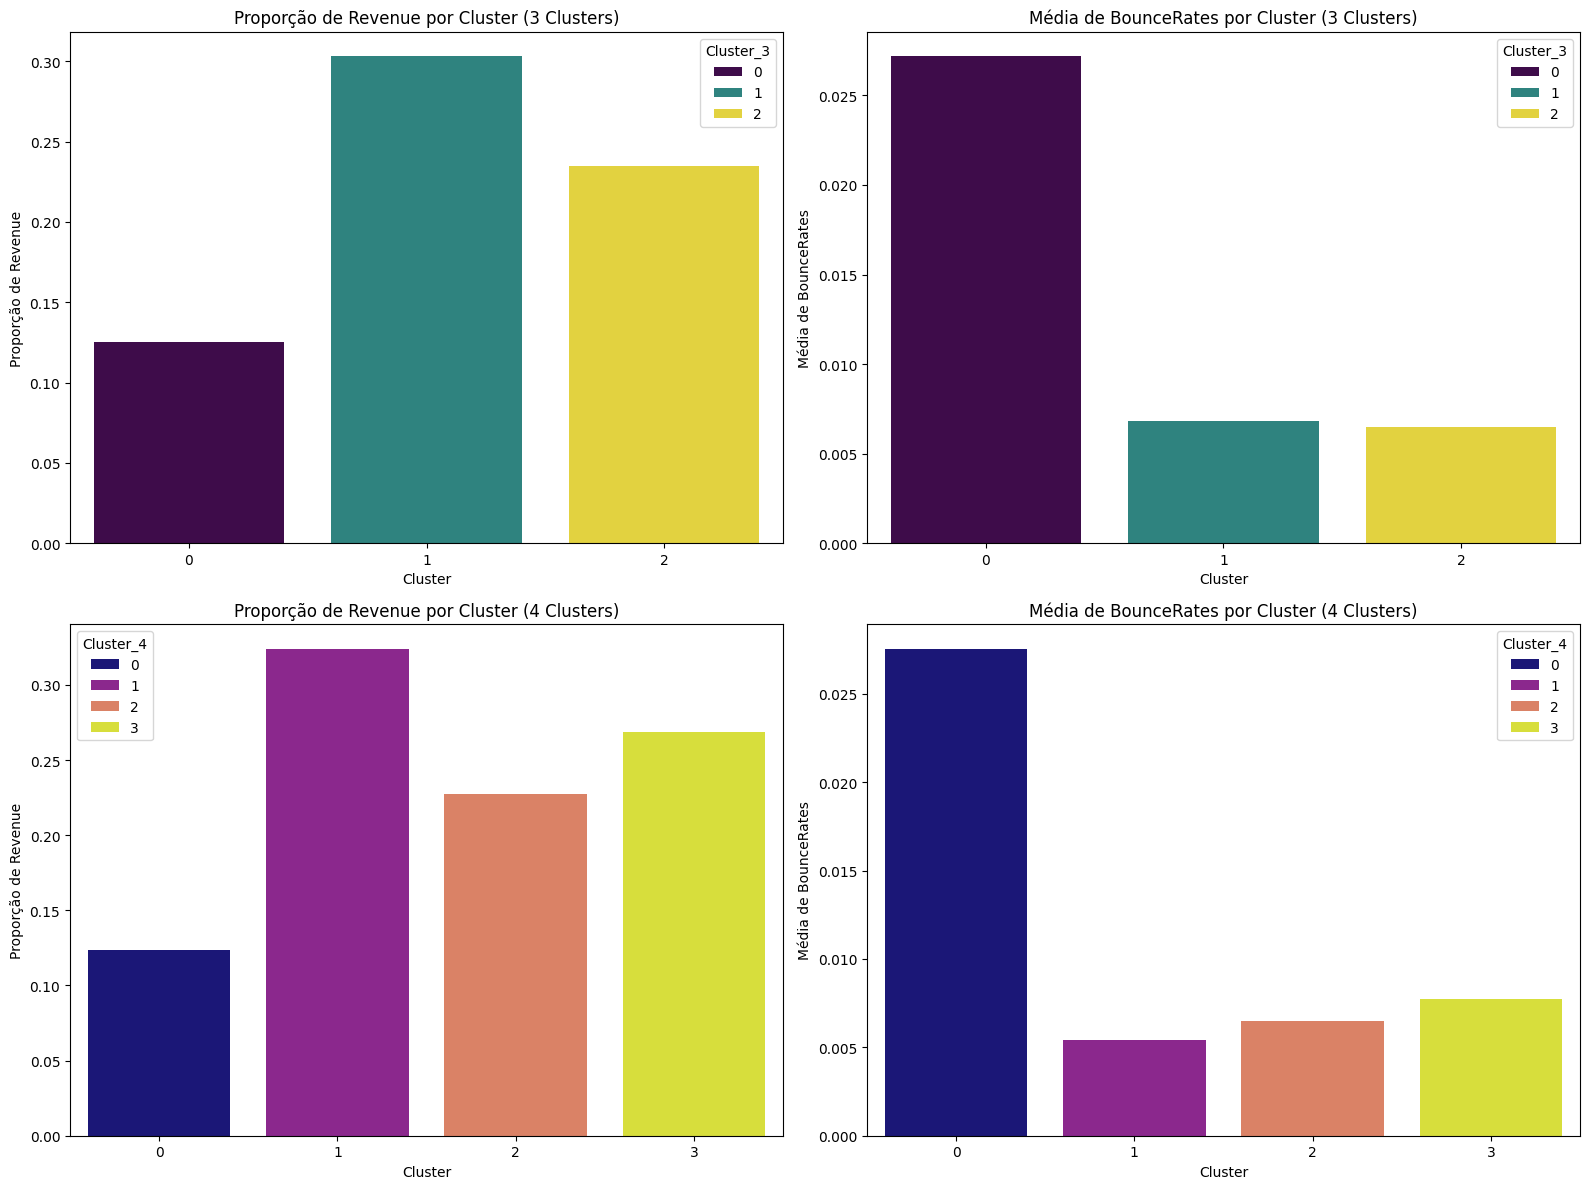

In [15]:
# Criando uma figura com 2 linhas e 2 colunas de subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 linhas, 2 colunas, tamanho total da figura 16x12

# --- Gráficos para 3 Clusters ---
# Gráfico 1: Proporção de Revenue por Cluster (3 Clusters)
sns.barplot(ax=axes[0, 0], data=cluster_3_summary, x='Cluster_3', y='Revenue', hue='Cluster_3', palette='viridis')
axes[0, 0].set_title('Proporção de Revenue por Cluster (3 Clusters)')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Proporção de Revenue')

# Gráfico 2: Média de BounceRates por Cluster (3 Clusters)
sns.barplot(ax=axes[0, 1], data=cluster_3_summary, x='Cluster_3', y='BounceRates',hue='Cluster_3', palette='viridis')
axes[0, 1].set_title('Média de BounceRates por Cluster (3 Clusters)')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Média de BounceRates')

# --- Gráficos para 4 Clusters ---
# Gráfico 3: Proporção de Revenue por Cluster (4 Clusters)
sns.barplot(ax=axes[1, 0], data=cluster_4_summary, x='Cluster_4', y='Revenue', hue='Cluster_4', palette='plasma')
axes[1, 0].set_title('Proporção de Revenue por Cluster (4 Clusters)')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Proporção de Revenue')

# Gráfico 4: Média de BounceRates por Cluster (4 Clusters)
sns.barplot(ax=axes[1, 1], data=cluster_4_summary, x='Cluster_4', y='BounceRates',hue='Cluster_4', palette='plasma')
axes[1, 1].set_title('Média de BounceRates por Cluster (4 Clusters)')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Média de BounceRates')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

* Após observar o gráficos foi decidido ficar com apenas **3 Clusters**.
  1. Os gráficos tem padrões similares.
  2. no caso de **4 clusters**, o agrupamento **2 e 3** possuem as mesmas tendencias.
     * podendo serem juntos formando assim **3 clusters**.



### Nomeando os grupos

|**Grupo**                   |**Nome**         | **Características** |
|:-:|:------------------:| :-:|
|Grupo 0       | **Cliente Curioso**| Fica pulando de página em página<br>Poucas chances finalizar a compra |
|Grupo 1       | **Cliente Objetivo**| Foca no produto que pretende comprar<br> Grandes chances de finalizar compra |
|Grupo 2       | **Cliente Comum** | Foca no produto que pretende comprar <br> Chances moderadas de finalizar a compra|

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

* **O grupo 0**, apelidado de **Cliente Curioso** possui pouquíssimas chances de finalizarem uma compra.
* **O grupo 1**, apelidado de **Cliente Objetivo** possui as maiores chances de finalizar uma compra. 
* **O grupo 2**, apelidado de **Cliente Comum** embora tenha uma menor probabilidade de finalizar uma compra ainda se mostra um cliente em potencial.

<br>

* Tendo em vista os resultados, jogadas de **marketing** surtirão mais efeito se forem direcionadas ao grupo **1 e 2**.

